# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install torchsummary

In [ ]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? False
Running on the CPU


In [ ]:
from gdrive.MyDrive.utils import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

100%|██████████| 170498071/170498071 [00:02<00:00, 70835474.91it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

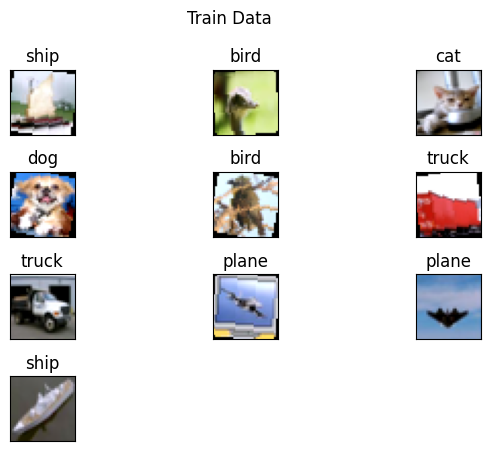

In [ ]:
# getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# classes needs to be listed using cifar10.classes
getSampleImages(
    train_loader,
    10,
    "Train Data",
    classes=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Model Params

In [ ]:
from gdrive.MyDrive.model_BN import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 30, 30]             216
              ReLU-2            [-1, 8, 30, 30]               0
       BatchNorm2d-3            [-1, 8, 30, 30]              16
           Dropout-4            [-1, 8, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]             128
        MaxPool2d-10            [-1, 8, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,152
             ReLU-12           [-1, 16, 14, 14]               0
      BatchNorm2d-13           [-1, 16, 14, 14]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 10

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler=None)

Epoch 1


Train: Loss=1.1243 Batch_id=781 Accuracy=48.47: 100%|██████████| 782/782 [01:43<00:00,  7.57it/s]


Test set: Average loss: 1.3204, Accuracy: 5155/10000 (51.55%)

Epoch 2


Train: Loss=1.4823 Batch_id=781 Accuracy=54.79: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]


Test set: Average loss: 1.2158, Accuracy: 5566/10000 (55.66%)

Epoch 3


Train: Loss=0.9675 Batch_id=781 Accuracy=57.85: 100%|██████████| 782/782 [01:43<00:00,  7.56it/s]


Test set: Average loss: 1.1283, Accuracy: 5894/10000 (58.94%)

Epoch 4


Train: Loss=0.7996 Batch_id=781 Accuracy=60.10: 100%|██████████| 782/782 [01:41<00:00,  7.71it/s]


Test set: Average loss: 1.0605, Accuracy: 6251/10000 (62.51%)

Epoch 5


Train: Loss=1.1873 Batch_id=781 Accuracy=61.79: 100%|██████████| 782/782 [01:38<00:00,  7.92it/s]


Test set: Average loss: 1.0165, Accuracy: 6355/10000 (63.55%)

Epoch 6


Train: Loss=0.7789 Batch_id=781 Accuracy=62.91: 100%|██████████| 782/782 [01:44<00:00,  7.51it/s]


Test set: Average loss: 1.0097, Accuracy: 6462/10000 (64.62%)

Epoch 7


Train: Loss=1.0452 Batch_id=781 Accuracy=64.43: 100%|██████████| 782/782 [01:41<00:00,  7.68it/s]


Test set: Average loss: 0.9116, Accuracy: 6777/10000 (67.77%)

Epoch 8


Train: Loss=1.0857 Batch_id=781 Accuracy=64.96: 100%|██████████| 782/782 [01:44<00:00,  7.52it/s]


Test set: Average loss: 0.9079, Accuracy: 6775/10000 (67.75%)

Epoch 9


Train: Loss=0.6763 Batch_id=781 Accuracy=65.89: 100%|██████████| 782/782 [01:36<00:00,  8.10it/s]


Test set: Average loss: 0.8955, Accuracy: 6815/10000 (68.15%)

Epoch 10


Train: Loss=1.2173 Batch_id=781 Accuracy=66.55: 100%|██████████| 782/782 [01:34<00:00,  8.29it/s]


Test set: Average loss: 0.8754, Accuracy: 6901/10000 (69.01%)



# Graphs

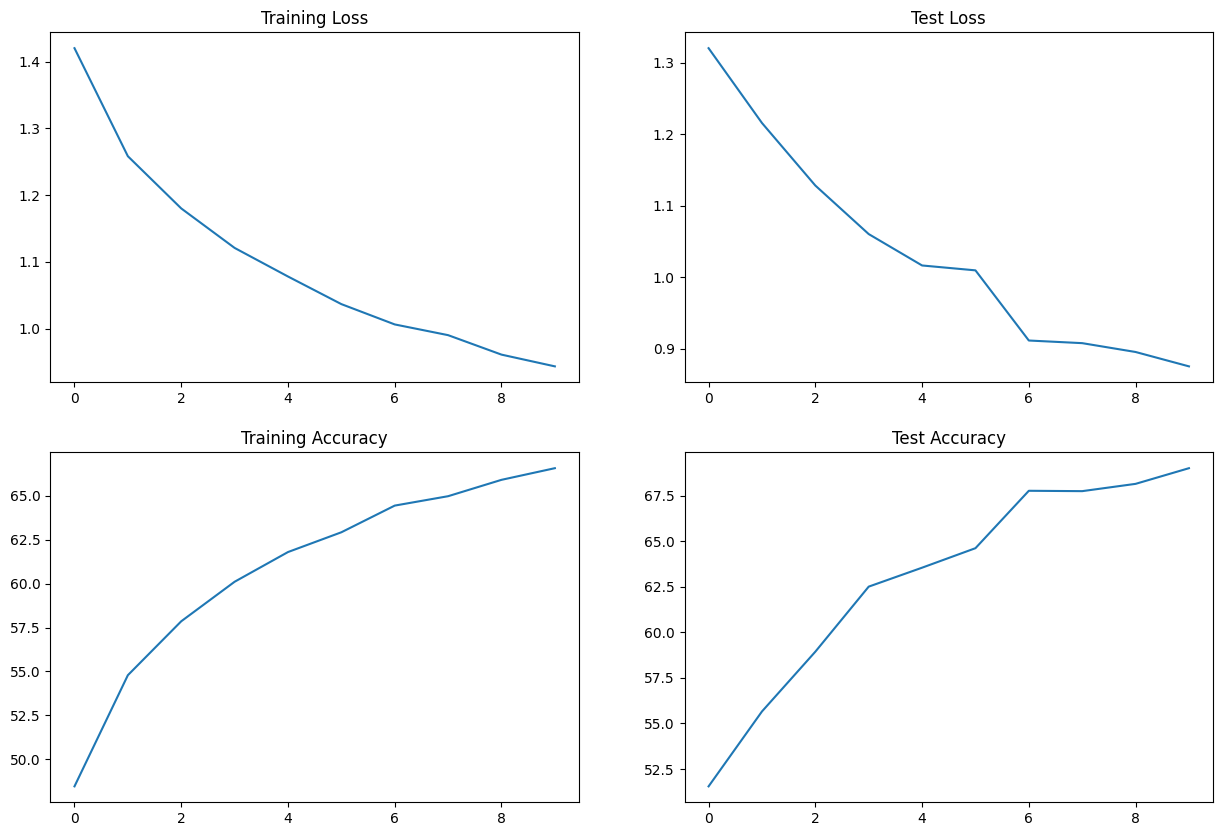

In [11]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)

#  Misclassified images

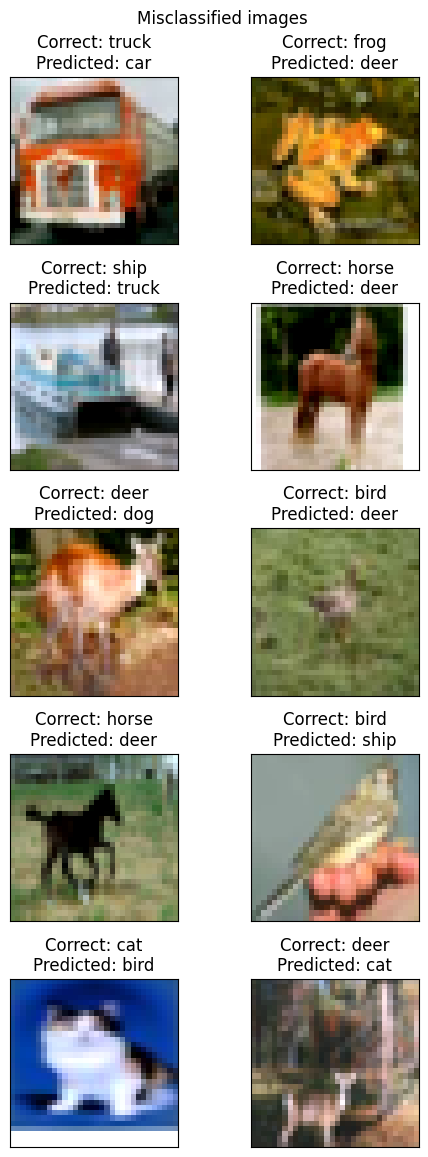

In [12]:
plot_misclassified_images(model, test_loader, ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], device)